# HW1
# Cody Ho
# DS 4420

In [1]:
import pandas as pd
import numpy as np
evs_df = pd.read_csv("evs.csv")
evs_df

,id,drive,acceleration,topspeed,electricrange,totalpower,batterycapacity,chargespeed
0,1647,Rear,7.8,185,390,168,77.4,49
1,1252,Rear,5.7,190,470,250,83.9,54
2,1534,Rear,7.9,160,450,150,82.0,55
3,1178,Rear,8.9,160,275,110,55.0,38
4,1279,Rear,8.7,160,330,132,62.0,53
...,...,...,...,...,...,...,...,...
114,1394,Rear,5.4,230,475,350,93.4,53
115,1557,Rear,8.4,160,430,150,82.0,52
116,1533,Rear,7.9,160,450,150,82.0,55
117,1547,Front,11.7,135,195,100,50.0,27


In [2]:
evs_df = evs_df.drop(columns="id")

In [3]:
# 2a:

# Separate features and target
Y = np.array([1 if x == "Rear" else 0 for x in evs_df["drive"]])
evs_df = evs_df.drop(columns="drive")

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# Min-max scale
evs_df_scaled = scaler.fit_transform(evs_df) # now evs_df_scaled is a numpy array

# Add additional intercept/bias column
X = np.hstack([np.ones((evs_df_scaled.shape[0], 1)), evs_df_scaled])

# Split data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [4]:
# 2b:
np.random.seed(8)

eta = .10
q = 4
W1 = np.random.randn(7, q)
W2 = np.random.randn(q, 1) # number of hidden nodes

In [5]:
# define forward pass with ReLU for hidden layer and sigmoid for output
def sigmoid(z):
    return 1 / (1 + np.exp(-np.clip(z, -500, 500)))  
    
def f(x):
    # x should be column vector (d, 1)
    h = np.maximum(0, W1.T.dot(x))  # ReLU activation for hidden layer
    z = W2.T.dot(h)  
    return sigmoid(z)  # sigmoid activation for output layer

In [ ]:
# keep track of gradient descent errors
# to monitor convergence
errors = []
epochs = 500
n = X_train.shape[0]
d = X_train.shape[1]

# Iterate over steps
for epoch in range(epochs):
    dW2 = 0
    for i, y_i in enumerate(Y_train):
        x = np.reshape(X_train[i], (d, 1))
        h = np.maximum(0, W1.T.dot(x))  # ReLU activation
        z = W2.T.dot(h)  # linear combination before sigmoid
        sigma = sigmoid(z)  # sigmoid output
        
        # Gradient for W2 with sigmoid and log loss:
        # dL/dW2 = (1/n) * (sigma - y_i) * h
        dW2 += (1/n) * (sigma - y_i) * h

    W2 = W2 - eta * dW2 
    
    dW1 = 0
    for i, y_i in enumerate(Y_train):
        x = np.reshape(X_train[i], (d, 1))
        h = np.maximum(0, W1.T.dot(x))  # ReLU activation
        z = W2.T.dot(h)  # linear combination before sigmoid
        sigma = sigmoid(z)  # sigmoid output
        mat1 = np.heaviside(h, 0)  

        # Gradient for W1 with sigmoid and log loss:
        # dL/dW1 = (1/n) * (sigma - y_i) * W2 * mat1 * x
        dW1 += (1/n) * (sigma - y_i) * np.kron(x, (W2 * mat1).T)

    W1 = W1 - eta * dW1
    
    # Calculate log loss (binary cross-entropy)
    # L = (1/n) * Σ [-y_i * log(sigma_i) - (1 - y_i) * log(1 - sigma_i)]
    total_loss = 0
    for i, y_i in enumerate(Y_train):
        x = np.reshape(X_train[i], (d, 1))
        sigma_i = f(x)[0, 0]  # get scalar value

        total_loss += -y_i * np.log(sigma_i) - (1 - y_i) * np.log(1 - sigma_i)
    e = (1/n) * total_loss
    errors.append(e)

In [7]:
# Print final weight estimates
print("W1:")
print(W1)
print("\n W2:")
print(W2)

# Make predictions on test data
def predict(X_data):
    """
    Make predictions on X_data using the trained model
    Returns: array of predicted probabilities
    """
    predictions = []
    n_test = X_data.shape[0]
    for i in range(n_test):
        x = np.reshape(X_data[i], (d, 1))  # shape x to a column vector to multiple against W1.t
        prob = f(x)[0, 0]  # get probability from sigmoid output
        predictions.append(prob)
    return np.array(predictions)

# Get predicted probabilities on test set
Y_test_pred_probs = predict(X_test)

# Convert probabilities to binary predictions (threshold = 0.5)
Y_test_pred = (Y_test_pred_probs >= 0.5).astype(int)

# Calculate accuracy (classification metric)
accuracy = np.mean(Y_test_pred == Y_test)
print(f"\nTest Accuracy: {accuracy:.4f}")



W1:
[[ 0.76131187  1.21683805 -1.94697031 -1.4511086 ]
 [-2.3161296   2.8171848   1.72783617  2.22959545]
 [ 1.43300012  0.33662738 -1.18342715  1.79683284]
 [-0.59811721 -1.07181498 -0.37835857 -0.86548064]
 [ 1.21024109 -0.4392276  -0.06566103 -0.26173147]
 [ 1.65881689 -0.69648037 -0.17424821  0.3713433 ]
 [-1.45130437 -0.18873166  0.53546825  1.22133559]]

 W2:
[[ 1.50613258]
 [-1.676425  ]
 [ 1.44252413]
 [-0.3699143 ]]

Test Accuracy: 0.7917


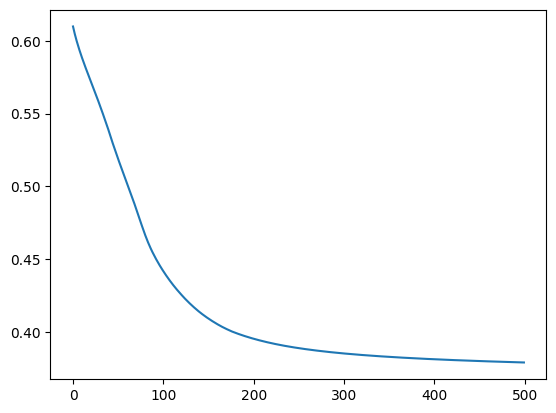

In [8]:
import matplotlib.pyplot as plt
plt.plot(range(epochs), errors, label='line')
plt.show()